In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
import random

In [27]:
df = pd.read_csv('adult.csv')


In [28]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [29]:
df['income'].nunique()

2

In [30]:
df.income = df['income'].map({'<=50K': 0, '>50K': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [31]:
df_num = df.drop(["educational-num","income"], axis=1)
df_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [32]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


In [33]:
df[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.275178
0,0,36.872184


In [38]:
data = df[(np.abs(stats.zscore(df["age"])) < 3)] 

income_1 = data[data['income']==1]['age']
income_0 = data[data['income']==0]['age']


income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [39]:
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.7723130292347355
p value 0.00021711529800013795
we reject null hypothesis


In [40]:
df.race.value_counts(normalize=True)*100

White                 85.504279
Black                  9.592154
Asian-Pac-Islander     3.110028
Amer-Indian-Eskimo     0.962287
Other                  0.831252
Name: race, dtype: float64

In [52]:
c_t = pd.crosstab(df['race'].sample(frac=0.002, replace=True, random_state=1),
                  df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
race,,
Asian-Pac-Islander,5,0
Black,6,1
Other,1,0
White,59,26


In [51]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
[[ 3.62244898  1.37755102]
 [ 5.07142857  1.92857143]
 [ 0.7244898   0.2755102 ]
 [61.58163265 23.41836735]]
probability=0.950, critical=7.815, stat=3.292
Independent (fail to reject H0)


In [53]:
c_t = pd.crosstab(df['education'].sample(frac=0.002, replace=True, random_state=1),
                  df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
education,,
10th,3,0
11th,7,0
12th,1,0
9th,1,0
Assoc-acdm,4,1
Assoc-voc,4,4
Bachelors,9,7
Doctorate,0,2
HS-grad,27,6


In [56]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=10
[[ 2.17346939  0.82653061]
 [ 5.07142857  1.92857143]
 [ 0.7244898   0.2755102 ]
 [ 0.7244898   0.2755102 ]
 [ 3.62244898  1.37755102]
 [ 5.79591837  2.20408163]
 [11.59183673  4.40816327]
 [ 1.44897959  0.55102041]
 [23.90816327  9.09183673]
 [ 4.34693878  1.65306122]
 [11.59183673  4.40816327]]
probability=0.950, critical=18.307, stat=20.760
Dependent (reject H0)


In [57]:
df.workclass.value_counts(normalize=True)*100

Private             69.419762
Self-emp-not-inc     7.907129
Local-gov            6.420703
?                    5.730724
State-gov            4.055935
Self-emp-inc         3.470374
Federal-gov          2.931903
Without-pay          0.042996
Never-worked         0.020474
Name: workclass, dtype: float64

In [58]:
df.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [59]:
df.gender.value_counts(normalize=True)*100

Male      66.848204
Female    33.151796
Name: gender, dtype: float64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


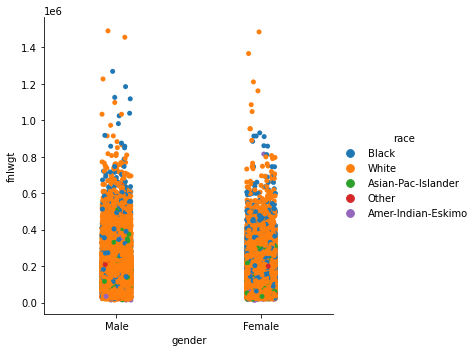

In [61]:
sns.catplot(x='gender',y='fnlwgt',hue = 'race',data=df)

In [62]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000
